#MNIST Dataset

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [ ]:
mnist.feature_names

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# print(X[0:1])
some_digit = X[0:1]
some_digit_image = some_digit.reshape(28, 28)
# print(some_digit_image)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

print('Solution :' + y[0]) # string

In [ ]:
import numpy as np
y = y.astype(np.uint8) # cast y to integers
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn_clf.predict(some_digit)

array([5], dtype=uint8)

In [ ]:
print("accuracy KNN (test): {:2f}".format(knn_clf.score(X_test, y_test)))

accuracy KNN (test): 0.962700


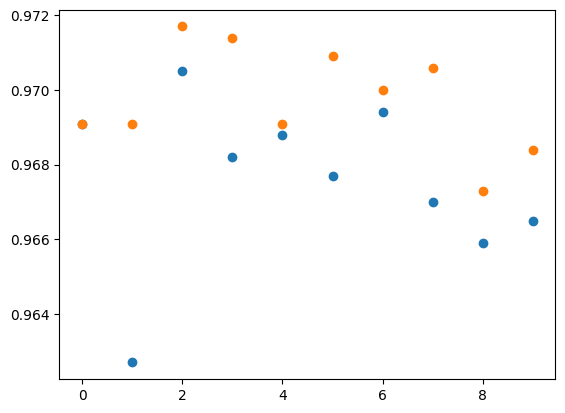

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X_result = []
y_result_1 = []
y_result = []
for i in range(10):
  knn_clf = KNeighborsClassifier(n_neighbors=(i+1))
  knn_clf_1 = KNeighborsClassifier(n_neighbors=(i+1), weights='distance')
  knn_clf.fit(X_train, y_train)
  knn_clf_1.fit(X_train, y_train)
  X_result.append(i)
  y_result.append(knn_clf.score(X_test, y_test))
  y_result_1.append(knn_clf_1.score(X_test, y_test))

plt.scatter(np.array(X_result), np.array(y_result))
plt.scatter(np.array(X_result), np.array(y_result_1))
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.9621, 0.962 , 0.9645])

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5882,    6,    6,    1,    1,    5,   16,    2,    2,    2],
       [   1, 6699,   16,    1,    3,    1,    3,   12,    1,    5],
       [  59,   94, 5620,   23,    7,    9,   12,  104,   19,   11],
       [   8,   24,   41, 5880,    3,   60,    4,   43,   37,   31],
       [   7,   72,    1,    0, 5610,    0,   16,   11,    2,  123],
       [  20,   23,    4,   77,    8, 5182,   57,    5,   11,   34],
       [  28,   18,    2,    0,    5,   29, 5834,    0,    2,    0],
       [   4,   87,   15,    2,   19,    2,    0, 6066,    2,   68],
       [  23,  104,   20,   98,   39,  118,   31,   20, 5325,   73],
       [  18,   21,    4,   52,   53,   12,    3,   98,   14, 5674]])

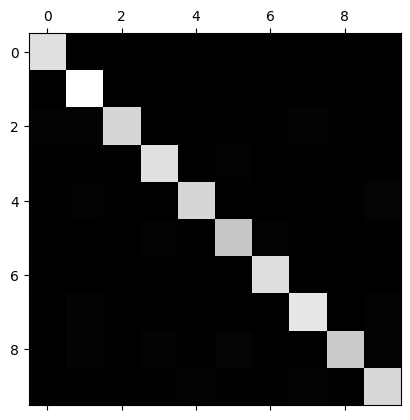

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

#Cancer Dataset

In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# print("cancer.keys(): \n{}".format(cancer.keys()))


# print("Feature_names: \n{}".format(cancer.feature_names))
# print("Shape of cancer data: {}".format(cancer.data.shape))

import numpy as np
print("Sample counts per class: \n{}".format(
    {
        n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))
    }
))

Sample counts per class: 
{'malignant': 212, 'benign': 357}


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df_cancer['cancer'] = cancer.target
print(df_cancer)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [3]:
print(cancer.target)
print(cancer.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["mean radius", "mean texture", "mean perimeter", "mean area"]
scatter_matrix(df_cancer[attributes], figsize=(12, 8))

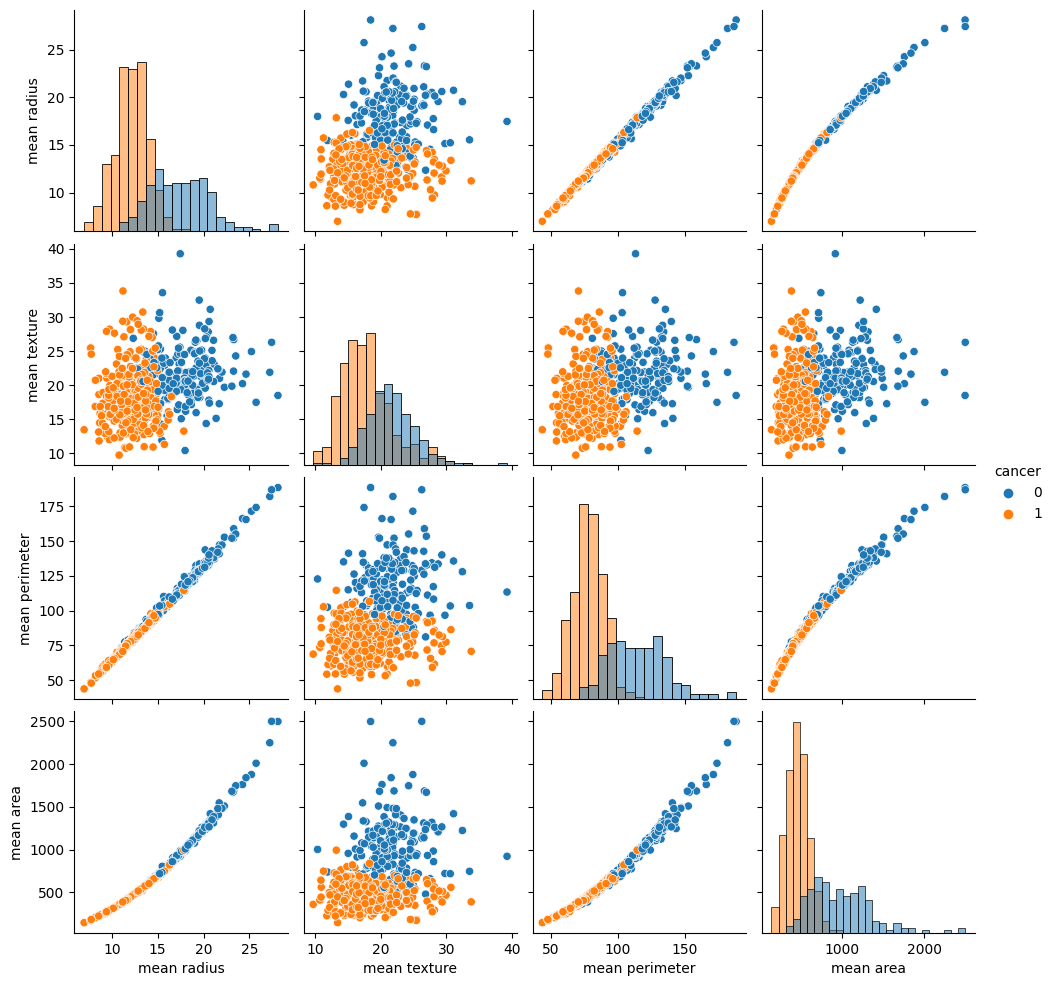

In [5]:
import seaborn as sns
attributes_sns = ["mean radius", "mean texture", "mean perimeter", "mean area", "cancer"]
sns.pairplot(df_cancer[attributes_sns], hue="cancer", diag_kind="hist")

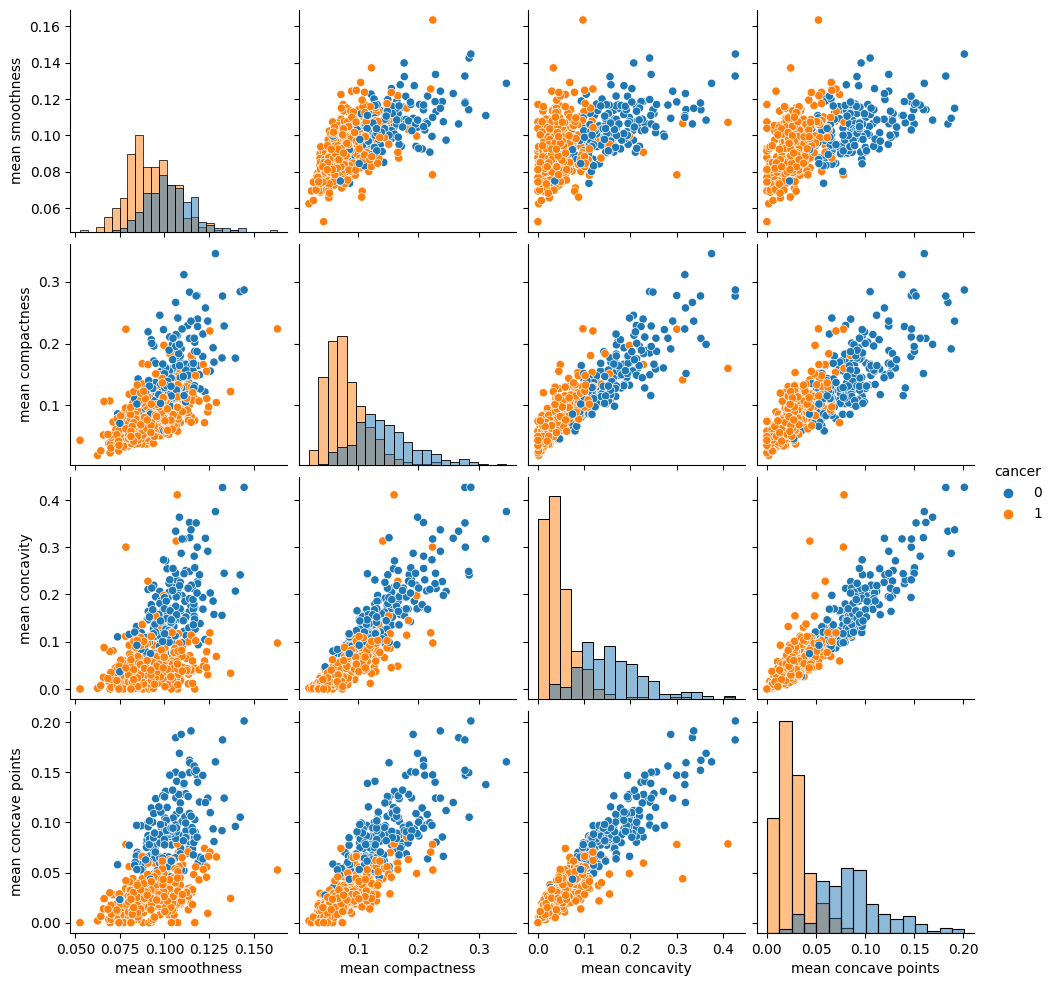

In [7]:
import seaborn as sns
attributes_sns = ["mean smoothness", "mean compactness", "mean concavity", "mean concave points", "cancer"]
sns.pairplot(df_cancer[attributes_sns], hue="cancer", diag_kind="hist")

In [ ]:
from sklearn.model_selection import train_test_split
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

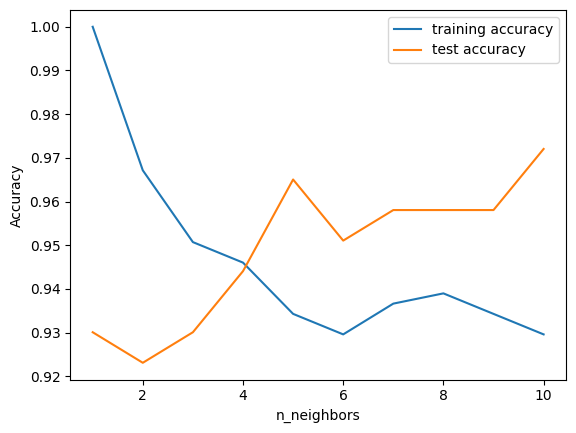

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)

  training_accuracy.append(clf.score(X_train, y_train))

  test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

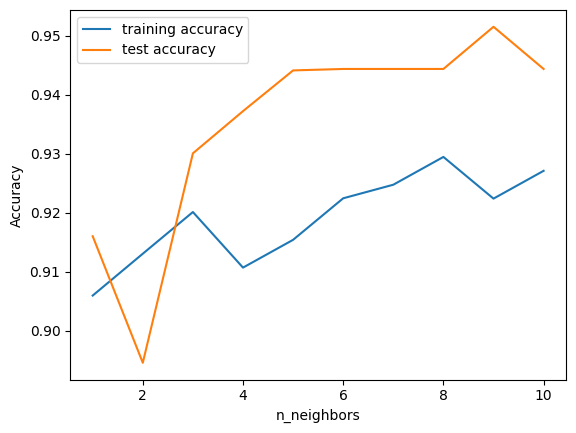

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
  clf1 = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf2 = KNeighborsClassifier(n_neighbors=n_neighbors)

  training_accuracy.append(np.mean(
      cross_val_score(clf1, X_train, y_train, cv=5, scoring="accuracy")))
  test_accuracy.append(np.mean(
      cross_val_score(clf2, X_test, y_test, cv=5, scoring="accuracy")))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(
    n_neighbors=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    weights=['uniform', 'distance'],
)

grid_search = GridSearchCV(clf, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(X_test, y_test)

print('best_parameter: {}'.format(grid_search.best_params_))
print('best_estimator: {}'.format(grid_search.best_estimator_))

best_parameter: {'n_neighbors': 9, 'weights': 'distance'}
best_estimator: KNeighborsClassifier(n_neighbors=9, weights='distance')


In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(mean_score, params)

0.9160098522167488 {'n_neighbors': 1, 'weights': 'uniform'}
0.9160098522167488 {'n_neighbors': 1, 'weights': 'distance'}
0.8945812807881774 {'n_neighbors': 2, 'weights': 'uniform'}
0.9160098522167488 {'n_neighbors': 2, 'weights': 'distance'}
0.9300492610837438 {'n_neighbors': 3, 'weights': 'uniform'}
0.9300492610837438 {'n_neighbors': 3, 'weights': 'distance'}
0.9371921182266011 {'n_neighbors': 4, 'weights': 'uniform'}
0.9371921182266011 {'n_neighbors': 4, 'weights': 'distance'}
0.9440886699507389 {'n_neighbors': 5, 'weights': 'uniform'}
0.9440886699507389 {'n_neighbors': 5, 'weights': 'distance'}
0.9443349753694582 {'n_neighbors': 6, 'weights': 'uniform'}
0.9443349753694582 {'n_neighbors': 6, 'weights': 'distance'}
0.9443349753694582 {'n_neighbors': 7, 'weights': 'uniform'}
0.951231527093596 {'n_neighbors': 7, 'weights': 'distance'}
0.9443349753694582 {'n_neighbors': 8, 'weights': 'uniform'}
0.9443349753694582 {'n_neighbors': 8, 'weights': 'distance'}
0.9514778325123153 {'n_neighbors'